In [5]:
from ai.utils.anchor import AnchorManager
import torch
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import resize
from PIL import Image

def plot_anchors(feature_maps: list[int], num_anchors: list[int], scales=[0.2, 0.9], ratios=[1, 1, 2, 3, 1 / 2, 1 / 3], size=1024, indexes= None, image: torch.Tensor=None):
    manager = AnchorManager(feature_maps, num_anchors, scales=scales, ratios=ratios)
    anchors = manager.anchors_xyxy[indexes] if indexes is not None else manager.anchors_xyxy
    print(f"{anchors.shape[0]} Anchors")

    anchors = anchors * size

    image = torch.full((3, size, size), 255, dtype=torch.uint8) if image is None else resize(image.to(torch.uint8), (size, size))
    anchor_image = draw_bounding_boxes(image, anchors)
    anchor_pil = Image.fromarray(anchor_image.permute(1, 2, 0).numpy())
    return anchor_pil

1 Anchors


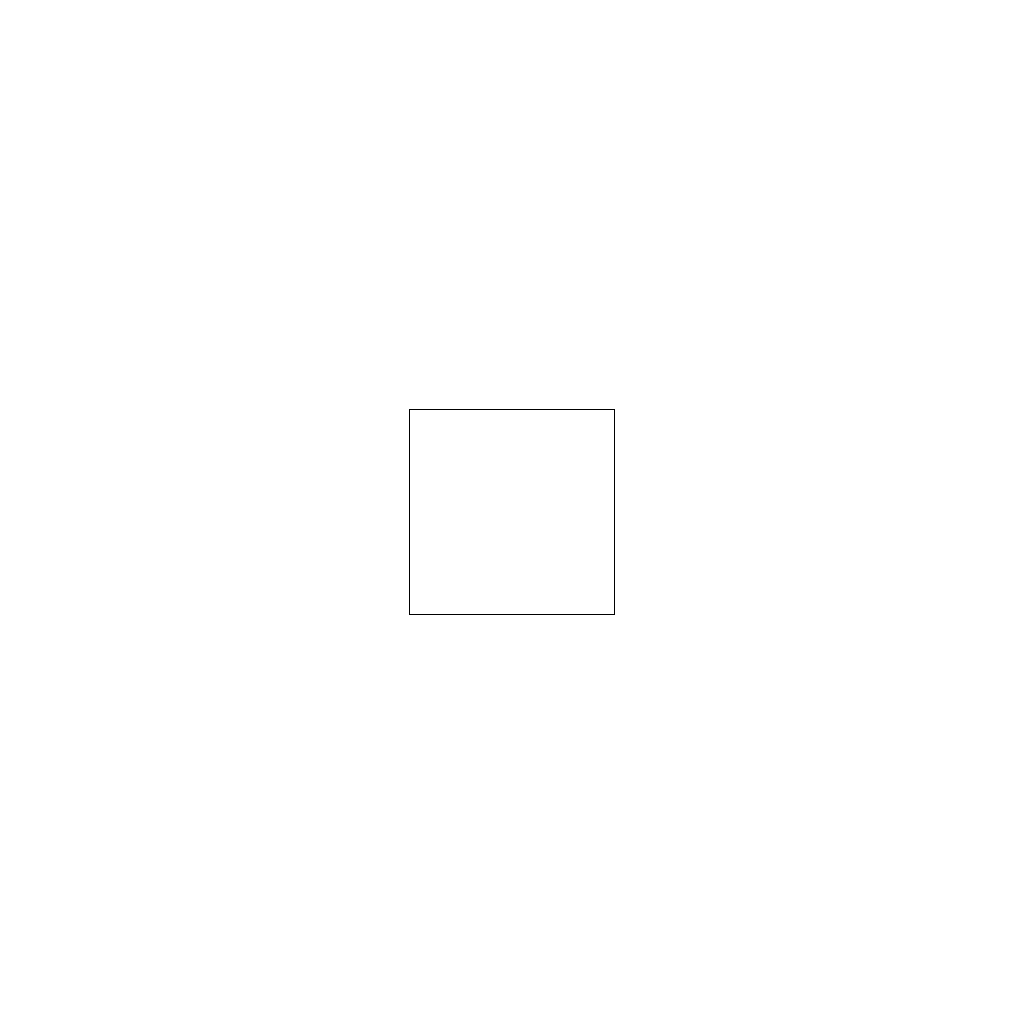

In [6]:
plot_anchors([1], [1])

4 Anchors


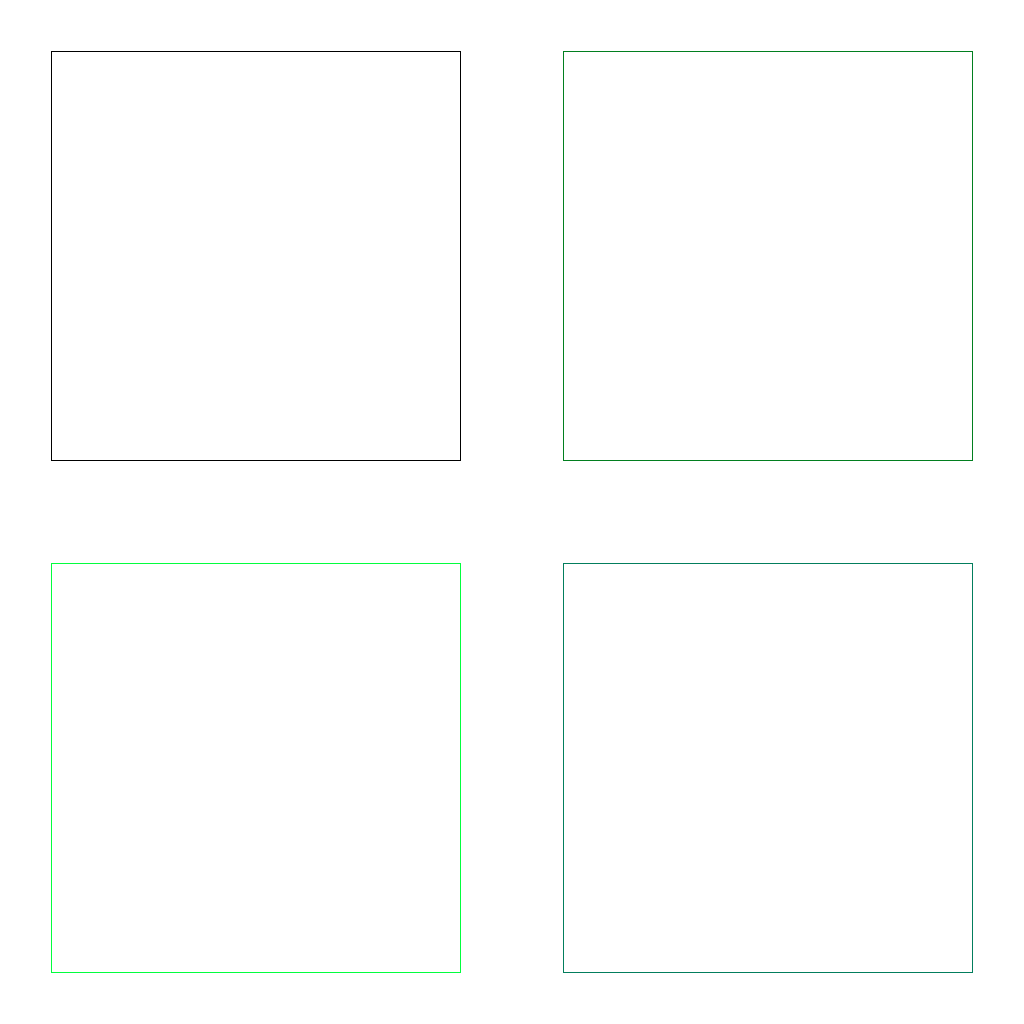

In [7]:
plot_anchors([2], [1], scales=[0.4, 0.6])

torch.Size([3, 300, 300])
23 Anchors


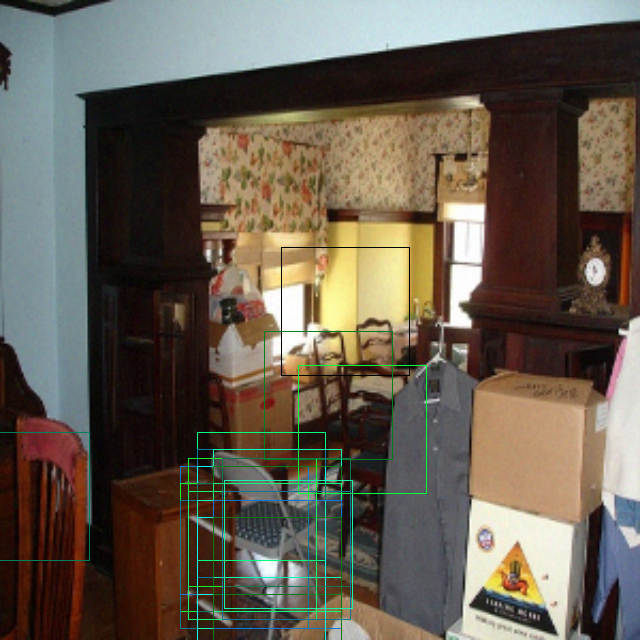

In [10]:
import numpy as np
anchor_indexes = [2816, 3572, 3884, 4412, 4468, 4620, 4624, 4768, 4772, 4776, 4920, 4924, 4928, 5072, 5076, 5080, 5228, 5232, 7528, 7534, 7642, 7648, 8446]
img = np.load("img.npy") * 255
img = torch.from_numpy(img)
print(img.shape)
plot_anchors([38, 19, 10, 5, 3, 1], [4, 6, 6, 6, 4, 4], indexes=anchor_indexes, image=img, size=640)